In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
from IPython.display import display
from ipywidgets import IntSlider

In [4]:
from sklearn.model_selection import train_test_split

In [85]:
rgen = np.random.RandomState(1)

x1 = rgen.normal(loc=50.0,scale=10.0, size= 42)
y1 = rgen.normal(loc=50.0,scale=18.0, size= 42)

x2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
y2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
k1 = np.array([x1, y1])
k2 = np.array([x2, y2])


<IPython.core.display.Javascript object>


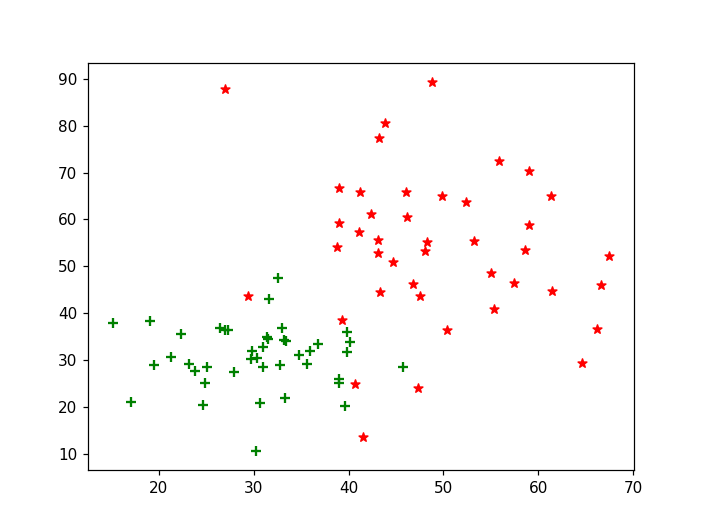

In [87]:
plt.scatter(k1[0], k1[1],  color='red', marker='*', label='class 1')
plt.scatter(k2[0], k2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()


In [118]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])

        self.cost_ = []
        
        for i in  range(self.n_iter ):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        #return 1.0 / (1.0 + np.exp(- X ))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [88]:
# подготовка к формированию

# это дяля вывода
kg1 = k1.copy()
kg2 = k2.copy()

# это подготовка
k1 = k1.T
k2 = k2.T
kg1 /= 100
kg2 /= 100

In [89]:
# формируем X
X = np.zeros( (84,2) )
X[:42] = k1
X[42:] = k2
X /= 100 

In [90]:
# формируем y
y = np.ones( (84), dtype=int )
y[:42] = -1


In [84]:
#rgen = np.random.RandomState(1)
#w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
#w_

In [17]:
#output =np.dot(X, w_[1:]) + w_[0]

In [16]:
#0.66243454* -0.00611756 +  0.36551151* -0.00528172 + 0.01624345

0.0102604375028804

In [22]:
#errors = y - output
#errors 

array([-1.01026044, -1.00930903, -1.01081862, -1.01180581, -1.00983289,
       -1.00995506, -1.00936218, -1.01042271, -1.01006326, -1.01103125,
       -1.01073556, -1.01213624, -1.01093965, -1.01022105, -1.00905259,
       -1.01033147, -1.01037779, -1.01023934, -1.0112352 , -1.00899616,
       -1.01072948, -1.01012692, -1.00952782, -1.01030826, -1.00891686,
       -1.00951718, -1.00854115, -1.01244394, -1.01208063, -1.01069896,
       -1.01081479, -1.00995355, -1.01066412, -1.0129834 , -1.01124556,
       -1.0097644 , -1.01100858, -1.00967596, -1.00973979, -1.01028073,
       -1.0104838 , -1.01069699,  0.98796112,  0.9873774 ,  0.98634137,
        0.98772591,  0.98715951,  0.98747393,  0.98724334,  0.98749957,
        0.98732766,  0.98660027,  0.98760355,  0.98673065,  0.98734686,
        0.98721734,  0.98679407,  0.98747496,  0.98732464,  0.98809269,
        0.98759752,  0.98752502,  0.98667336,  0.98752052,  0.987637  ,
        0.98699799,  0.98691501,  0.98616348,  0.98694326,  0.98

In [20]:
#X.T.dot(errors) 

array([ -8.14833137, -10.09005686])

In [91]:
# мешаем наши данные

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02, random_state=1, stratify=y )


In [119]:
ada = AdaLineGD( eta=0.01, n_iter=100, random_state=1)

In [120]:
ada.fit(X,y)

<IPython.core.display.Javascript object>


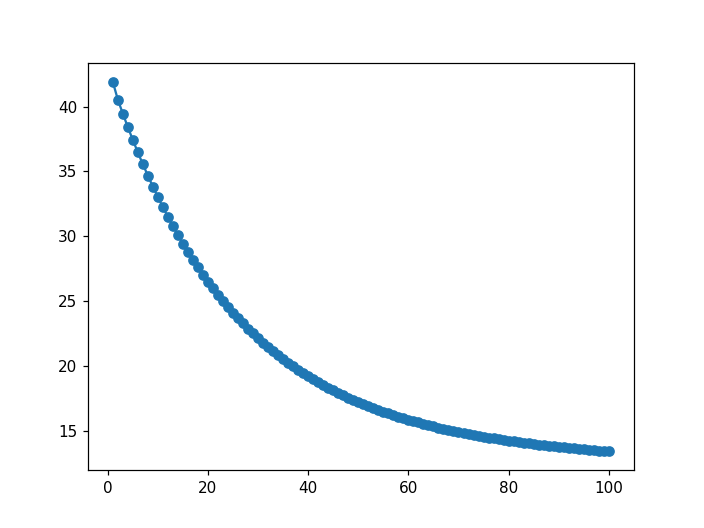

In [121]:
plt.plot(range(1, len(ada.cost_)+ 1), ada.cost_, marker='o' )
plt.show()

<IPython.core.display.Javascript object>


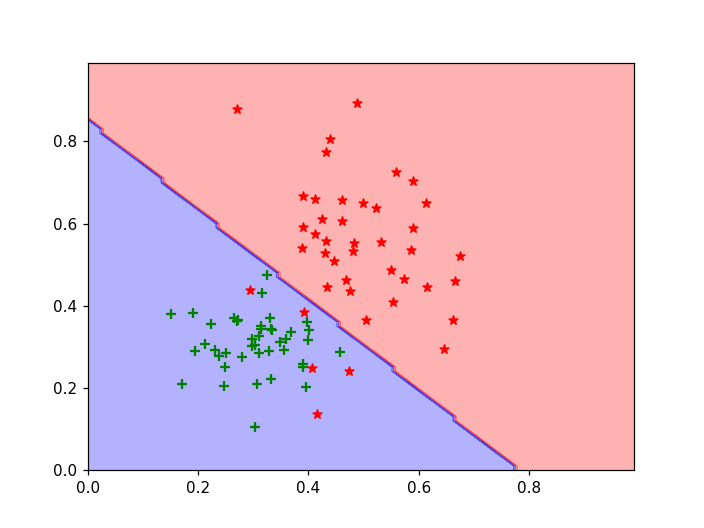

In [122]:
x1_min, x1_max = 0,1
x2_min, x2_max = 0,1
resol = 0.01

cmap = ListedColormap(['red', 'blue'])

xx1, xx2 = np.meshgrid(
                       np.arange(x1_min, x1_max, resol), 
                       np.arange(x2_min, x2_max, resol) 
                      )

Z = ada.predict(
                np.array([xx1.ravel(), xx2.ravel()] ).T
                )
Z = Z.reshape(xx1.shape)

plt.contourf( xx1, xx2, Z, alpha=0.3, cmap=cmap )
plt.scatter(kg1[0], kg1[1],  color='red', marker='*', label='class 1')
plt.scatter(kg2[0], kg2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


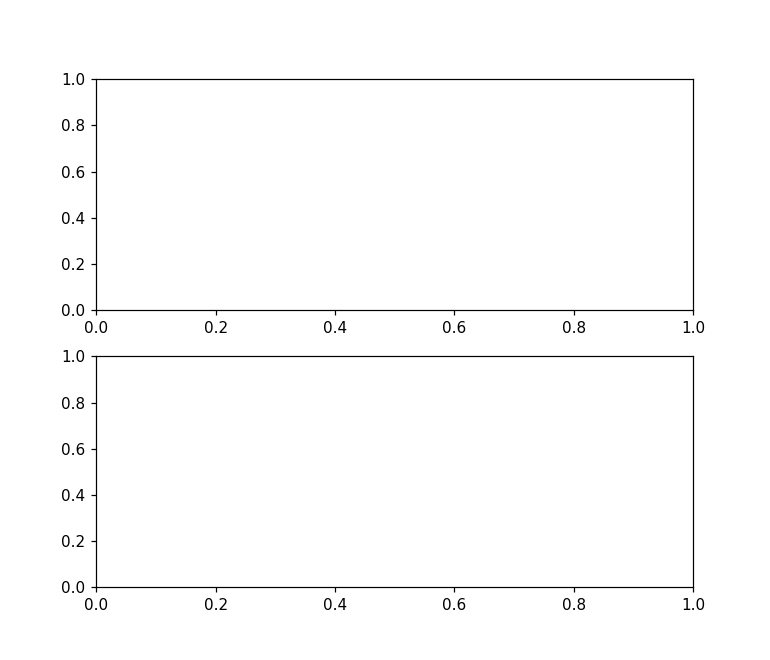

In [104]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))
def draw_graph(X, y, n_iter, ):
    
    axs[0].clear()
    axs[1].clear()
     
    ada = AdaLineGD( eta=0.01, n_iter=n_iter, random_state=1)
    ada.fit(X,y)
    x_, y_ = np.meshgrid(
                        np.arange( X[:,0].min()-0.1, X[:, 0].max() + 0.1, 0.01),
                        np.arange( X[:,1].min()-0.1, X[:, 1].max() + 0.2, 0.01)
                        )

    Z = ada.predict( np.array([x_.ravel() , y_.ravel()]).T)
    Z = Z.reshape(x_.shape)

    axs[0].contourf(x_,y_, Z, alpha=0.3, colors=['red', 'blue'])

    axs[0].scatter(X[y==np.unique(y)[0], 0], X[y==np.unique(y)[0], 1], color='red', marker='o', label='class1')
    
    axs[0].scatter(X[y==np.unique(y)[1], 0], X[y==np.unique(y)[1], 1], color='green', marker='+', label='class2')
    
    axs[1].plot( 
          range( 1, len(ada.cost_ ) + 1), 
          ada.cost_, marker='o'
        )
    plt.xlabel('Эпохи')
    plt.ylabel('Количество обновлений')
   

    plt.show()

In [55]:
%matplotlib notebook

<IPython.core.display.Javascript object>


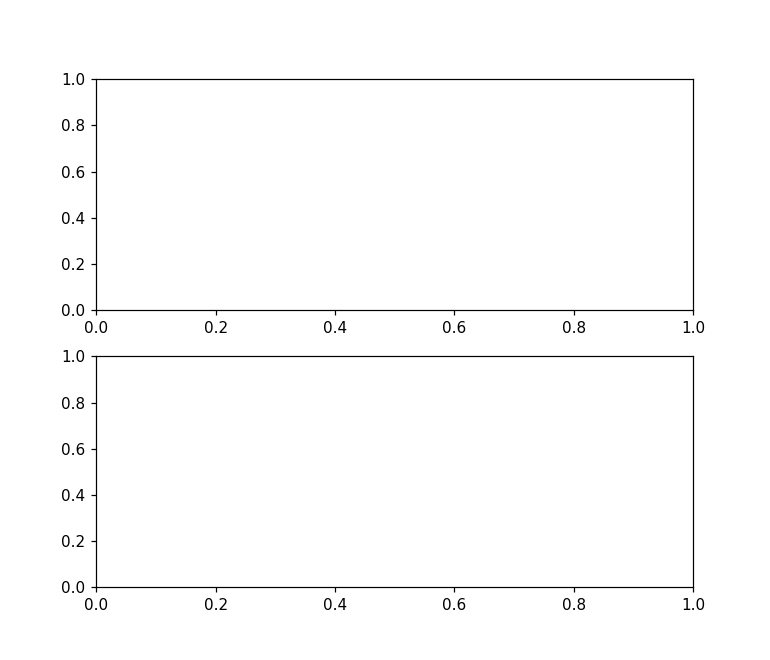

IntSlider(value=1, continuous_update=False, description='Эпох:', max=1000)

In [124]:

fig, axs = plt.subplots(2, 1, figsize=(7, 6))
iSlider = IntSlider(
    value=1, # Первоначальное значение
    min=0,     # Минимум
    max=1000,  # Максимум
    step=1,  # Шаг изменения
    description='Эпох:',
    continuous_update=False, #False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)
iSlider.observe(lambda i: draw_graph(X_train,y_train, i['new']), names='value')
display(iSlider)